**DATA LOADING**

Import relevant libraries for data loading, visualisation and pre-processing.


In [42]:
#loading dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Load the data CIFAR10 in cifar variable.
Store the data in train and test sets using cifar.load_data()


In [43]:
#loading DATASET
cifar = keras.datasets.cifar10 
(X_train, y_train), (X_test, y_test) = cifar.load_data()

**DATA VISUALIZATION AND PRE PROCESSING**

Check the shape of train and test set.
We can see that the train set has 50000 images with 32*32 pixel and 3 color channels. The test set has 10000 images with 32*32 pixel and 3 color channels.


In [44]:
#checking shape
X_train.shape, y_train.shape


((50000, 32, 32, 3), (50000, 1))

In [45]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

Define a class name for each classes in a label

In [46]:
#define label

label = ['Airplane', 'Automobile', 'Bird', 'Cat',
                  'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

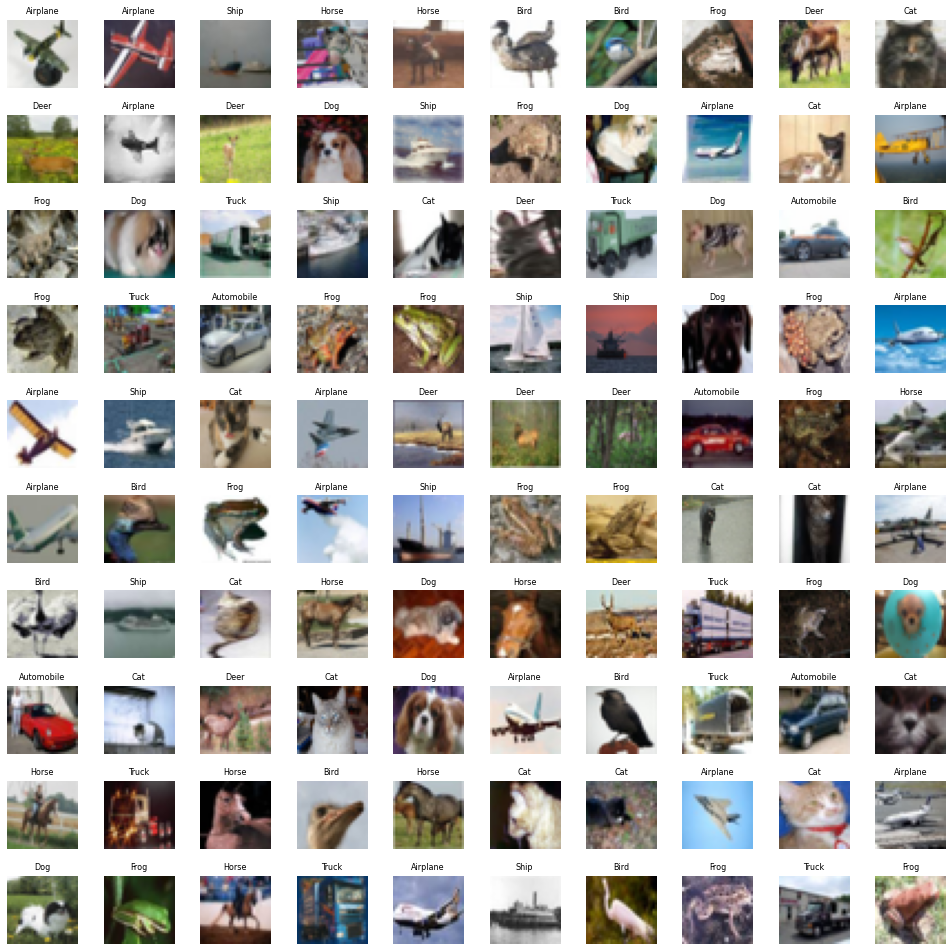

In [47]:

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(label[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

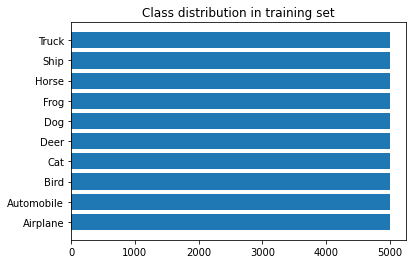

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(label, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

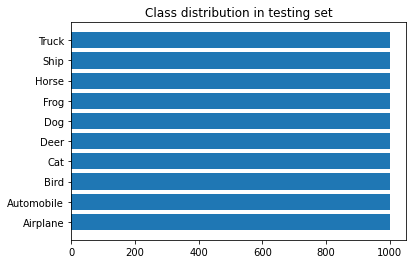

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(label, counts)
plt.title('Class distribution in testing set')

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes.
There are 50000 training images and 10000 test images.

Plot an image from the training set. Using colorbar helps in showing that the image contains pixels with values ranging from 0-255.
The train and test set images are rescaled because tensorflow takes input between 0-1. We then again plot the image and visualiza with colorbar to see the range after normalisation.

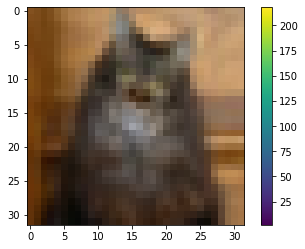

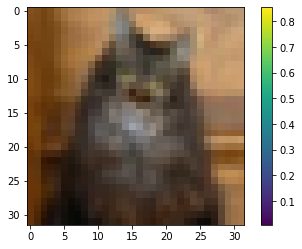

In [48]:
#plot image no 26 in training data with colorbar
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

#rescaling it between 0 to 1
X_train = X_train/255.0
X_test = X_test/255.0


#again plot
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

**MODEL BUILDING (1ST MODEL)**

Import relevant Libraries from tensorflow for building the model.

In [ ]:
#import library
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D

Define a model as Sequential. It is a linear stack of layers and we can create our model by passing a list of layer instances to the constructor or just by adding layers.
Define a Conv2D layer. A convolution layer is used to extract features from the image or part of an image. It creates a convolution kernel that is involved with layer input to produce a tensor of outputs. We have passed three parameters.
Here we are using 2 Conv2D layers with filter sizes 64 and 32 and kernel size is 3*3. The activation function used is Relu.
After the first Convolution layer we have the MaxPooling2D layer. This maxpooling layer reduces the size of the data, number of parameters, the amount of computation needed. 
For each convolution layer we define a BatchNormalization layer. This layer standardizes input to a layer for each mini-batch.
Next defined a Flatten layer. This layer converts the n-dimension array to 1dimension array.
Lastly we define a Dense layer. It is just a regular layer of neurons in a neural network that is densely connected. Each neuron receives input from all the neurons.

In [ ]:
#Build Model
model = Sequential()
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Next we use the model.compile is used to compile a model. In this we specify- 
optimizer- It is used to change the attributes of a neural network such as weights and learning rate. Here we used ‘Adam’ optimizer. It stands for Adaptive Moment Estimation. It helps the model to converge faster.
loss - Loss function used is ‘Sparse categorical cross-entropy’. Categorical cross-entropy is a loss function for categorical data and Sparse means it does use all possible classes but some of them.
metrics- It is used to evaluate machine learning algorithms. Here we used ‘Accuracy’. It is the ratio of the number of correct predictions to the total number of input samples.

In [ ]:
#compliation of model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

**MODEL TRAINING**

model.fit is used to train our model. It takes train and test data to fit our model.
Verbose- It has 3 parameters to pass 0,1, and 2. verbose = 1, which includes both progress bar and one line per epoch, verbose = 0, means silent, verbose = 2, one line per epoch i.e. epoch no./total no. of epochs
Epochs- one epoch is when an entire dataset is passed forward and backward through the neural network only once.

Here we initially train our model for 10 epochs.

In [ ]:
#fit model
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 110s 99ms/step - loss: 1.4827 - accuracy: 0.5037 - val_loss: 1.4086 - val_accuracy: 0.5286
Epoch 2/10
1094/1094 [==============================] - 113s 103ms/step - loss: 0.9629 - accuracy: 0.6640 - val_loss: 1.2688 - val_accuracy: 0.5645
Epoch 3/10
1094/1094 [==============================] - 115s 105ms/step - loss: 0.7487 - accuracy: 0.7364 - val_loss: 1.8612 - val_accuracy: 0.4961
Epoch 4/10
1094/1094 [==============================] - 101s 93ms/step - loss: 0.5758 - accuracy: 0.7977 - val_loss: 1.1912 - val_accuracy: 0.6338
Epoch 5/10
1094/1094 [==============================] - 112s 103ms/step - loss: 0.4257 - accuracy: 0.8526 - val_loss: 1.9597 - val_accuracy: 0.5323
Epoch 6/10
1094/1094 [==============================] - 118s 108ms/step - loss: 0.3019 - accuracy: 0.8929 - val_loss: 1.5847 - val_accuracy: 0.6347
Epoch 7/10
1094/1094 [==============================] - 107s 97ms/step - loss: 0.2334 - accuracy: 0.9167 - val_los

**MODEL EVALUATION**

Plot the train and validation loss and accuracy per epoch.

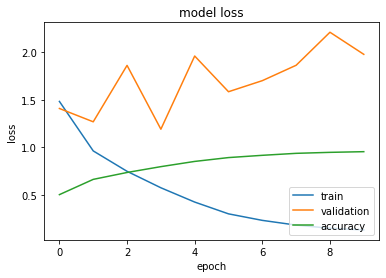

In [ ]:
#plot losses
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')


313/313 [==============================] - 8s 22ms/step - loss: 2.3091 - accuracy: 0.0914
Test Accuracy : 9.14%


The blue line represents training loss, orange validation loss, and green accuracy.

If training loss is much less than validation loss, so here we can say our model is underfitting. 

We can see that our validation accuracy is quite low. So to make our model much more accurate we can add data augmentation on our data and then train it again. Calling model.fit() again on augmented data will continue training where it left off. We are going to fit our data on a batch size of 32 and we are going to shift the range of width and height by 0.1 and flip the images horizontally. Then call model.fit again for 30 epochs.

**PERFORMANCE ENHANCEMENT BY DATA AUGMENTATION**

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=30)

Epoch 1/30
1562/1562 [==============================] - 170s 109ms/step - loss: 1.1638 - accuracy: 0.5866 - val_loss: 1.3683 - val_accuracy: 0.5505
Epoch 2/30
1562/1562 [==============================] - 188s 120ms/step - loss: 1.0452 - accuracy: 0.6321 - val_loss: 1.3381 - val_accuracy: 0.5654
Epoch 3/30
1562/1562 [==============================] - 202s 129ms/step - loss: 0.9786 - accuracy: 0.6565 - val_loss: 1.4116 - val_accuracy: 0.5622
Epoch 4/30
1562/1562 [==============================] - 211s 135ms/step - loss: 0.9195 - accuracy: 0.6770 - val_loss: 1.0464 - val_accuracy: 0.6445
Epoch 5/30
1562/1562 [==============================] - 194s 124ms/step - loss: 0.8778 - accuracy: 0.6929 - val_loss: 1.1245 - val_accuracy: 0.6300
Epoch 6/30
1562/1562 [==============================] - 169s 108ms/step - loss: 0.8452 - accuracy: 0.7029 - val_loss: 0.9494 - val_accuracy: 0.6818
Epoch 7/30
1562/1562 [==============================] - 165s 105ms/step - loss: 0.8185 - accuracy: 0.7141 - val_

Calculate Training and validation losses and accuracy after augmentation.

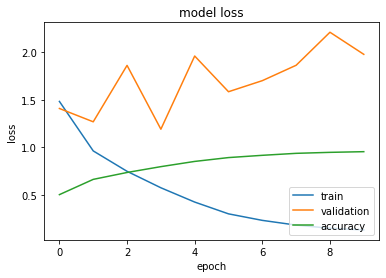

In [ ]:
#plot losses
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 12s 38ms/step - loss: 0.8557 - accuracy: 0.7345
Test Accuracy : 73.45%


**MODEL BUILDING (2ND MODEL)**

We can see that even after data augmentation and training for 30 epochs the validation accuracy remains low. So we will try with a deeper architecture.


*   Firstly 2 Conv2D Layers with 32 3*3 Filters. Each conv layer is followed by BatchNormalization layers. Following these conv layers, a MaxPooling2D layer is added.
*   Next we add 2 Conv2D Layers with 64 3*3 Filters. Each conv layer is followed by BatchNormalization layers. Following these conv layers, a MaxPooling2D layer is added.
*   Then we add 2 Conv2D Layers with 128 3*3 Filters. Each conv layer is followed by BatchNormalization layers. Following these conv layers, a MaxPooling2D layer is added.
*   Next we defined a Flatten layer. This layer converts the n-dimension array to 1dimension array. We have also added a Dropout layer with a dropout rate of 0.2
*   Lastly we define a Dense layer. It is just a regular layer of neurons in a neural network that is densely connected. Each neuron receives input from all the neurons. This is followed by another Dropout layer
*   Finally we have the output layer of size 10, as we have 10 classes as output and we use softmax as the activation function.







In [49]:
from keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(32,activation = 'relu', padding='same', kernel_size = (3,3 )))
model2.add(BatchNormalization())
model2.add(Conv2D(32, activation = 'relu', padding='same', kernel_size = (3,3 )))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64,activation = 'relu', padding='same', kernel_size = (3,3 )))
model2.add(BatchNormalization())
model2.add(Conv2D(64, activation = 'relu', padding='same', kernel_size = (3,3 )))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(128,activation = 'relu', padding='same', kernel_size = (3,3 )))
model2.add(BatchNormalization())
model2.add(Conv2D(128, activation = 'relu', padding='same', kernel_size = (3,3 )))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Flatten(input_shape = (32,32,3)))
model2.add(Dropout(0.2))

model2.add(Dense(1024, activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation = 'softmax'))

In [50]:
#compliation of model
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

**MODEL TRAINING**

In [ ]:
#fit model
history = model2.fit(X_train, y_train, epochs=30, verbose=1, 
                  validation_split=0.3)

Epoch 1/30
1094/1094 [==============================] - 518s 470ms/step - loss: 1.4466 - accuracy: 0.5078 - val_loss: 1.2365 - val_accuracy: 0.5719
Epoch 2/30
1094/1094 [==============================] - 475s 434ms/step - loss: 0.9381 - accuracy: 0.6740 - val_loss: 0.9586 - val_accuracy: 0.6781
Epoch 3/30
1094/1094 [==============================] - 479s 437ms/step - loss: 0.7739 - accuracy: 0.7298 - val_loss: 0.7843 - val_accuracy: 0.7291
Epoch 4/30
1094/1094 [==============================] - 464s 424ms/step - loss: 0.6666 - accuracy: 0.7676 - val_loss: 0.7101 - val_accuracy: 0.7654
Epoch 5/30
 937/1094 [========================>.....] - ETA: 1:01 - loss: 0.5568 - accuracy: 0.8073

Plotting the losses and accuracy

**MODEL EVALUATION**

In [ ]:
#plot losses
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

**PERFORMANCE IMPROVEMENT BY DATA AUGMENTATION**

Perform Data augmentation and then retrain to improve accuracy.

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
 
r = model2.fit(train_generator, validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=30)

Epoch 1/50
1562/1562 [==============================] - 133s 85ms/step - loss: 0.9049 - accuracy: 0.7204 - val_loss: 0.8503 - val_accuracy: 0.7450
Epoch 2/50
1562/1562 [==============================] - 135s 86ms/step - loss: 0.6308 - accuracy: 0.7856 - val_loss: 0.7064 - val_accuracy: 0.7757
Epoch 3/50
1562/1562 [==============================] - 133s 85ms/step - loss: 0.5916 - accuracy: 0.7970 - val_loss: 0.7278 - val_accuracy: 0.7717
Epoch 4/50
1562/1562 [==============================] - 134s 86ms/step - loss: 0.5729 - accuracy: 0.8034 - val_loss: 0.6504 - val_accuracy: 0.7884
Epoch 5/50
1562/1562 [==============================] - 131s 84ms/step - loss: 0.5560 - accuracy: 0.8061 - val_loss: 0.7429 - val_accuracy: 0.7572
Epoch 6/50
1562/1562 [==============================] - 133s 85ms/step - loss: 0.5497 - accuracy: 0.8082 - val_loss: 0.6238 - val_accuracy: 0.7951
Epoch 7/50
1562/1562 [==============================] - 133s 85ms/step - loss: 0.5367 - accuracy: 0.8135 - val_loss: 0

Plotting the losses and accuracy

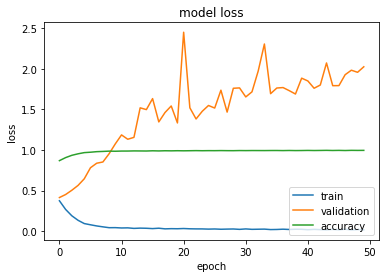

In [ ]:
#plot losses
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

**PREDICTION ON TEST IMAGES**

Specify the image_number for the image you would like to test.

Original label is Cat and predicted label is Cat


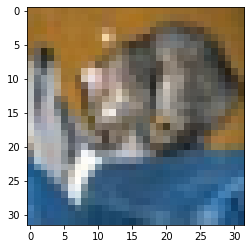

In [ ]:
# select the image from our test dataset
image_number = 0
 
# display the image
plt.imshow(X_test[image_number])
 
# load the image in an array
n = np.array(X_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = label[model2.predict(p).argmax()]
predicted_label 
# load the original label
original_label = label[y_test[image_number][0]]
y_test[image_number][0]
# # display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))


**SAVE THE MODEL**

In [ ]:
# save the model
model2.save('/content/drive/MyDrive/Colab Notebooks/cifar_6layer_conv.h5')